In [5]:
from keras.applications.vgg16 import VGG16
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
from keras.datasets.cifar10 import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# ((x_train, y_train), (x_test, y_test))
((x_train, y_train), (x_test, y_test)) = load_data()

In [7]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (50000, 32, 32, 3)
測試資料維度: (10000, 32, 32, 3)


In [11]:
trans = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",
         5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

什麼分類: 馬


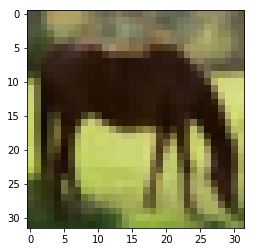

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("什麼分類:", trans[y_train[c][0]])
plt.imshow(x_train[c])

In [21]:
# 資料預處理
# 1. 圖片 = 0~1
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 2. 目標: One-hot
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
# see see
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# 一個過濾器(3 * 3 * 3) * (n個過濾器)32 + (bias)32
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               activation="relu",
               filters=32,
               kernel_size=(3, 3),
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3 * 32) * 64 + 64
cnn.add(Conv2D(activation="relu",
               filters=64,
               kernel_size=(3, 3),
               padding="same"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________
